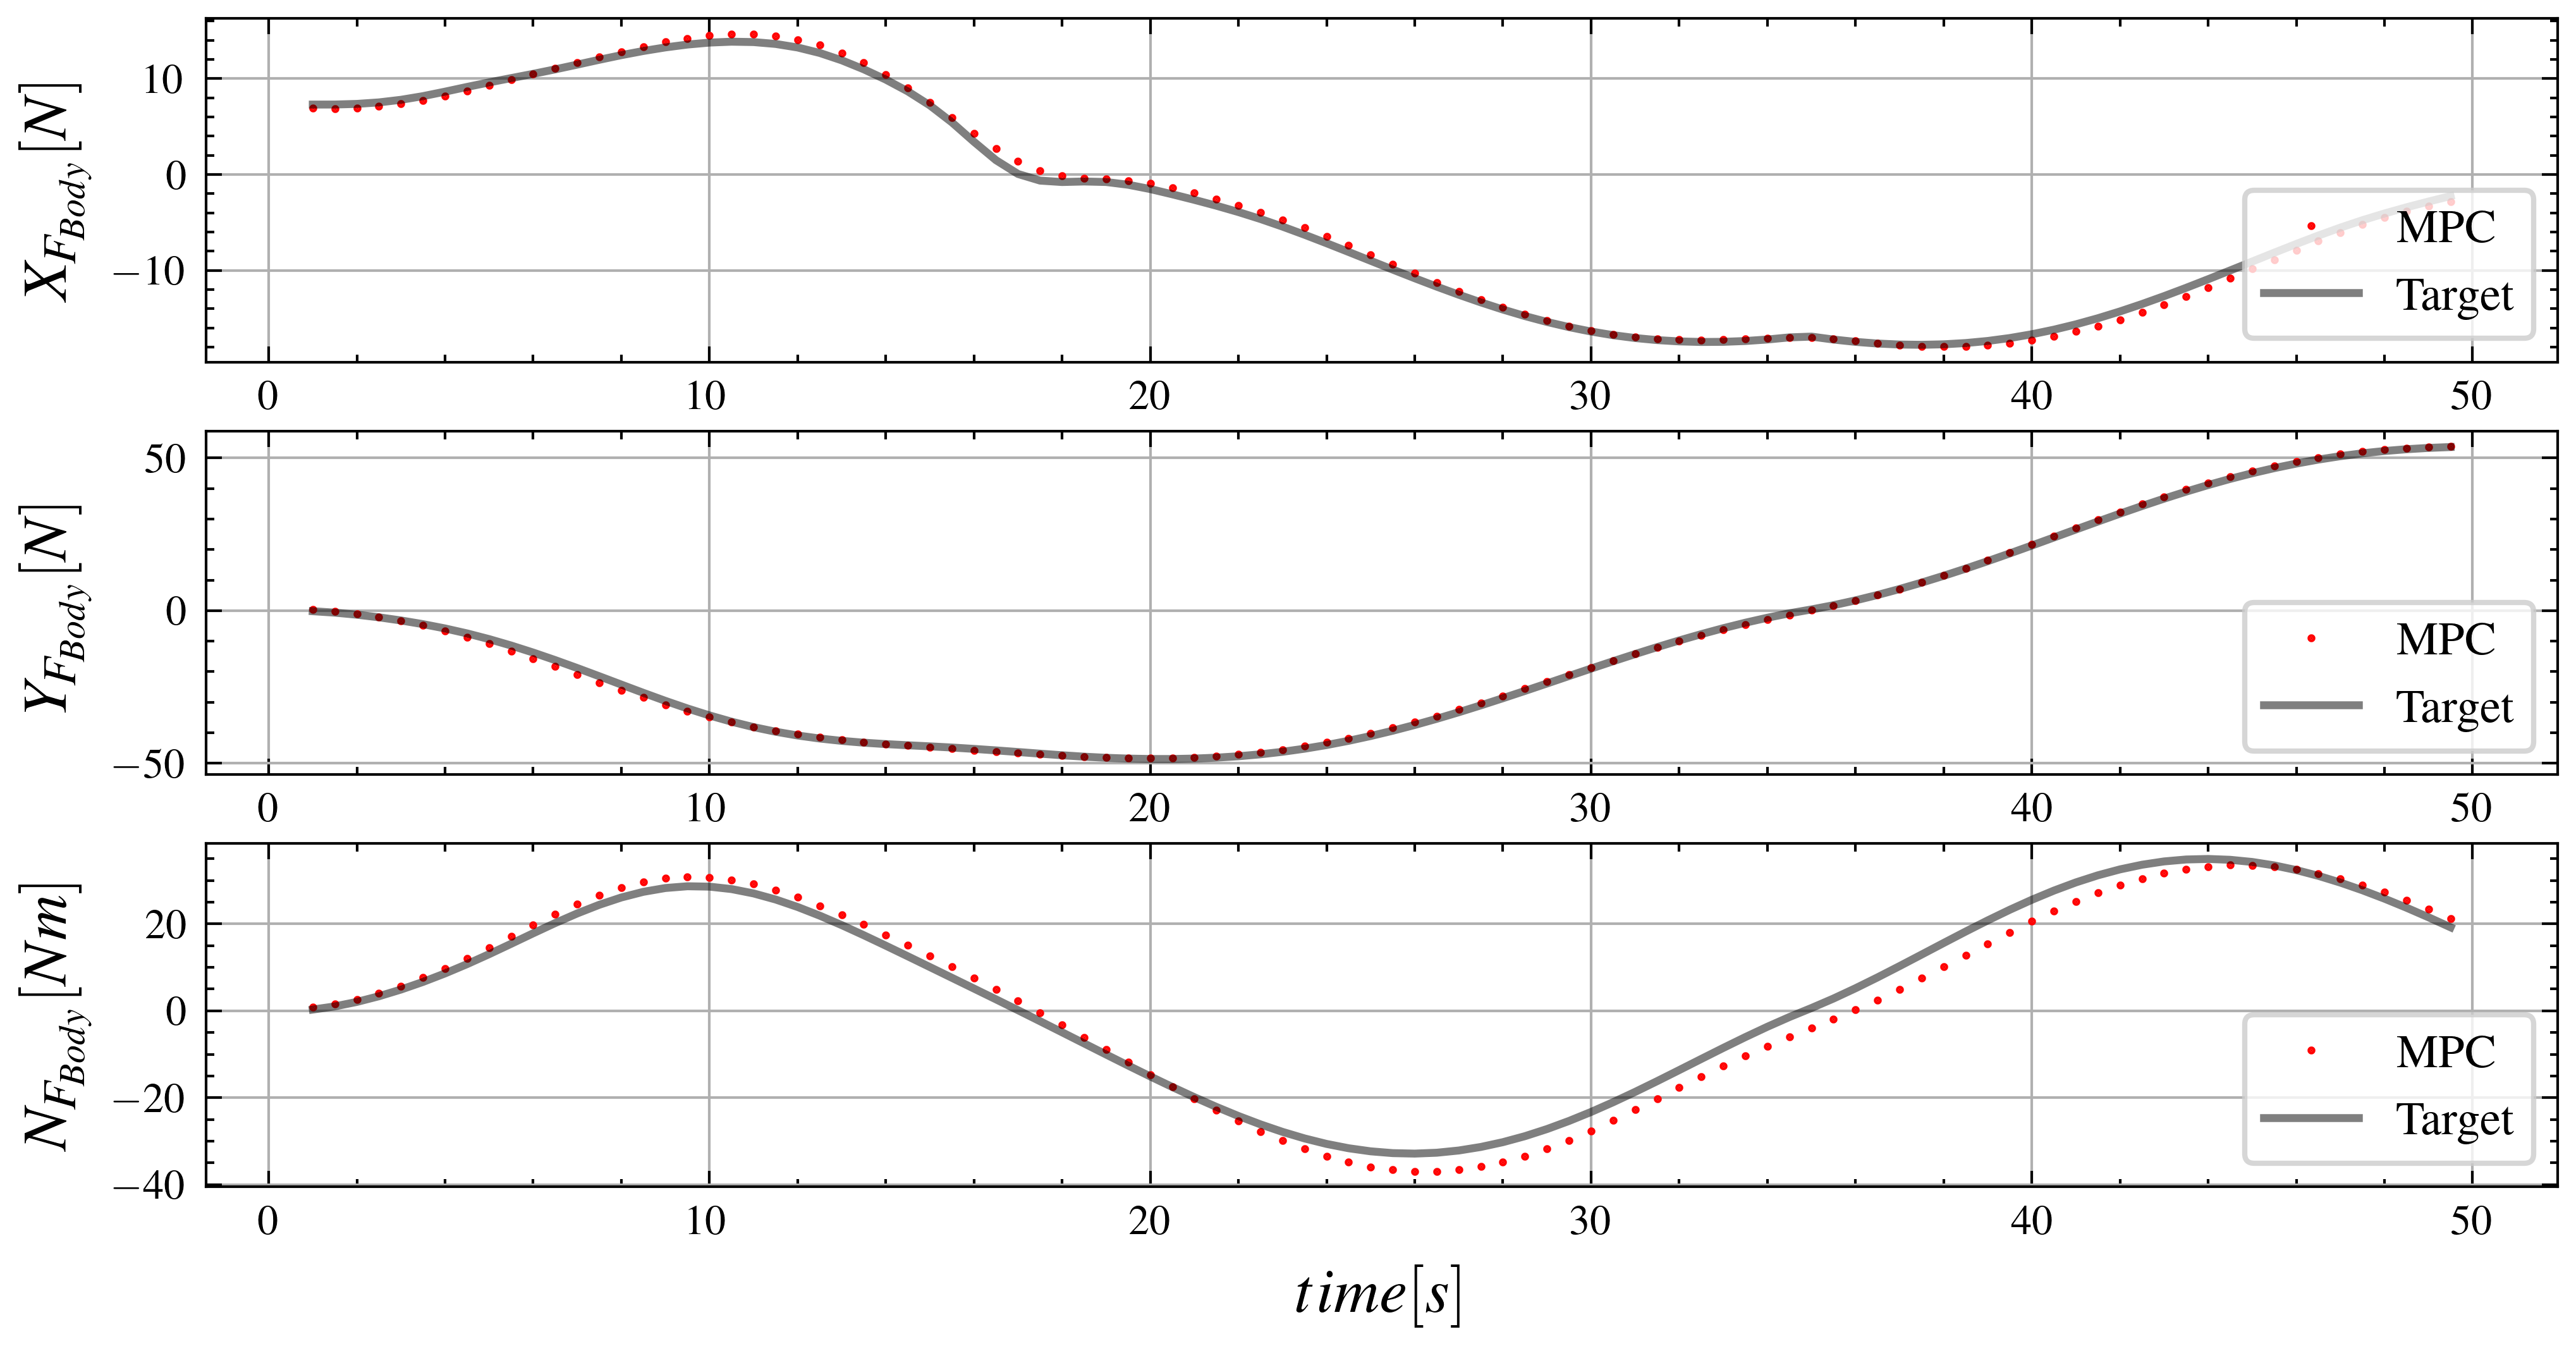

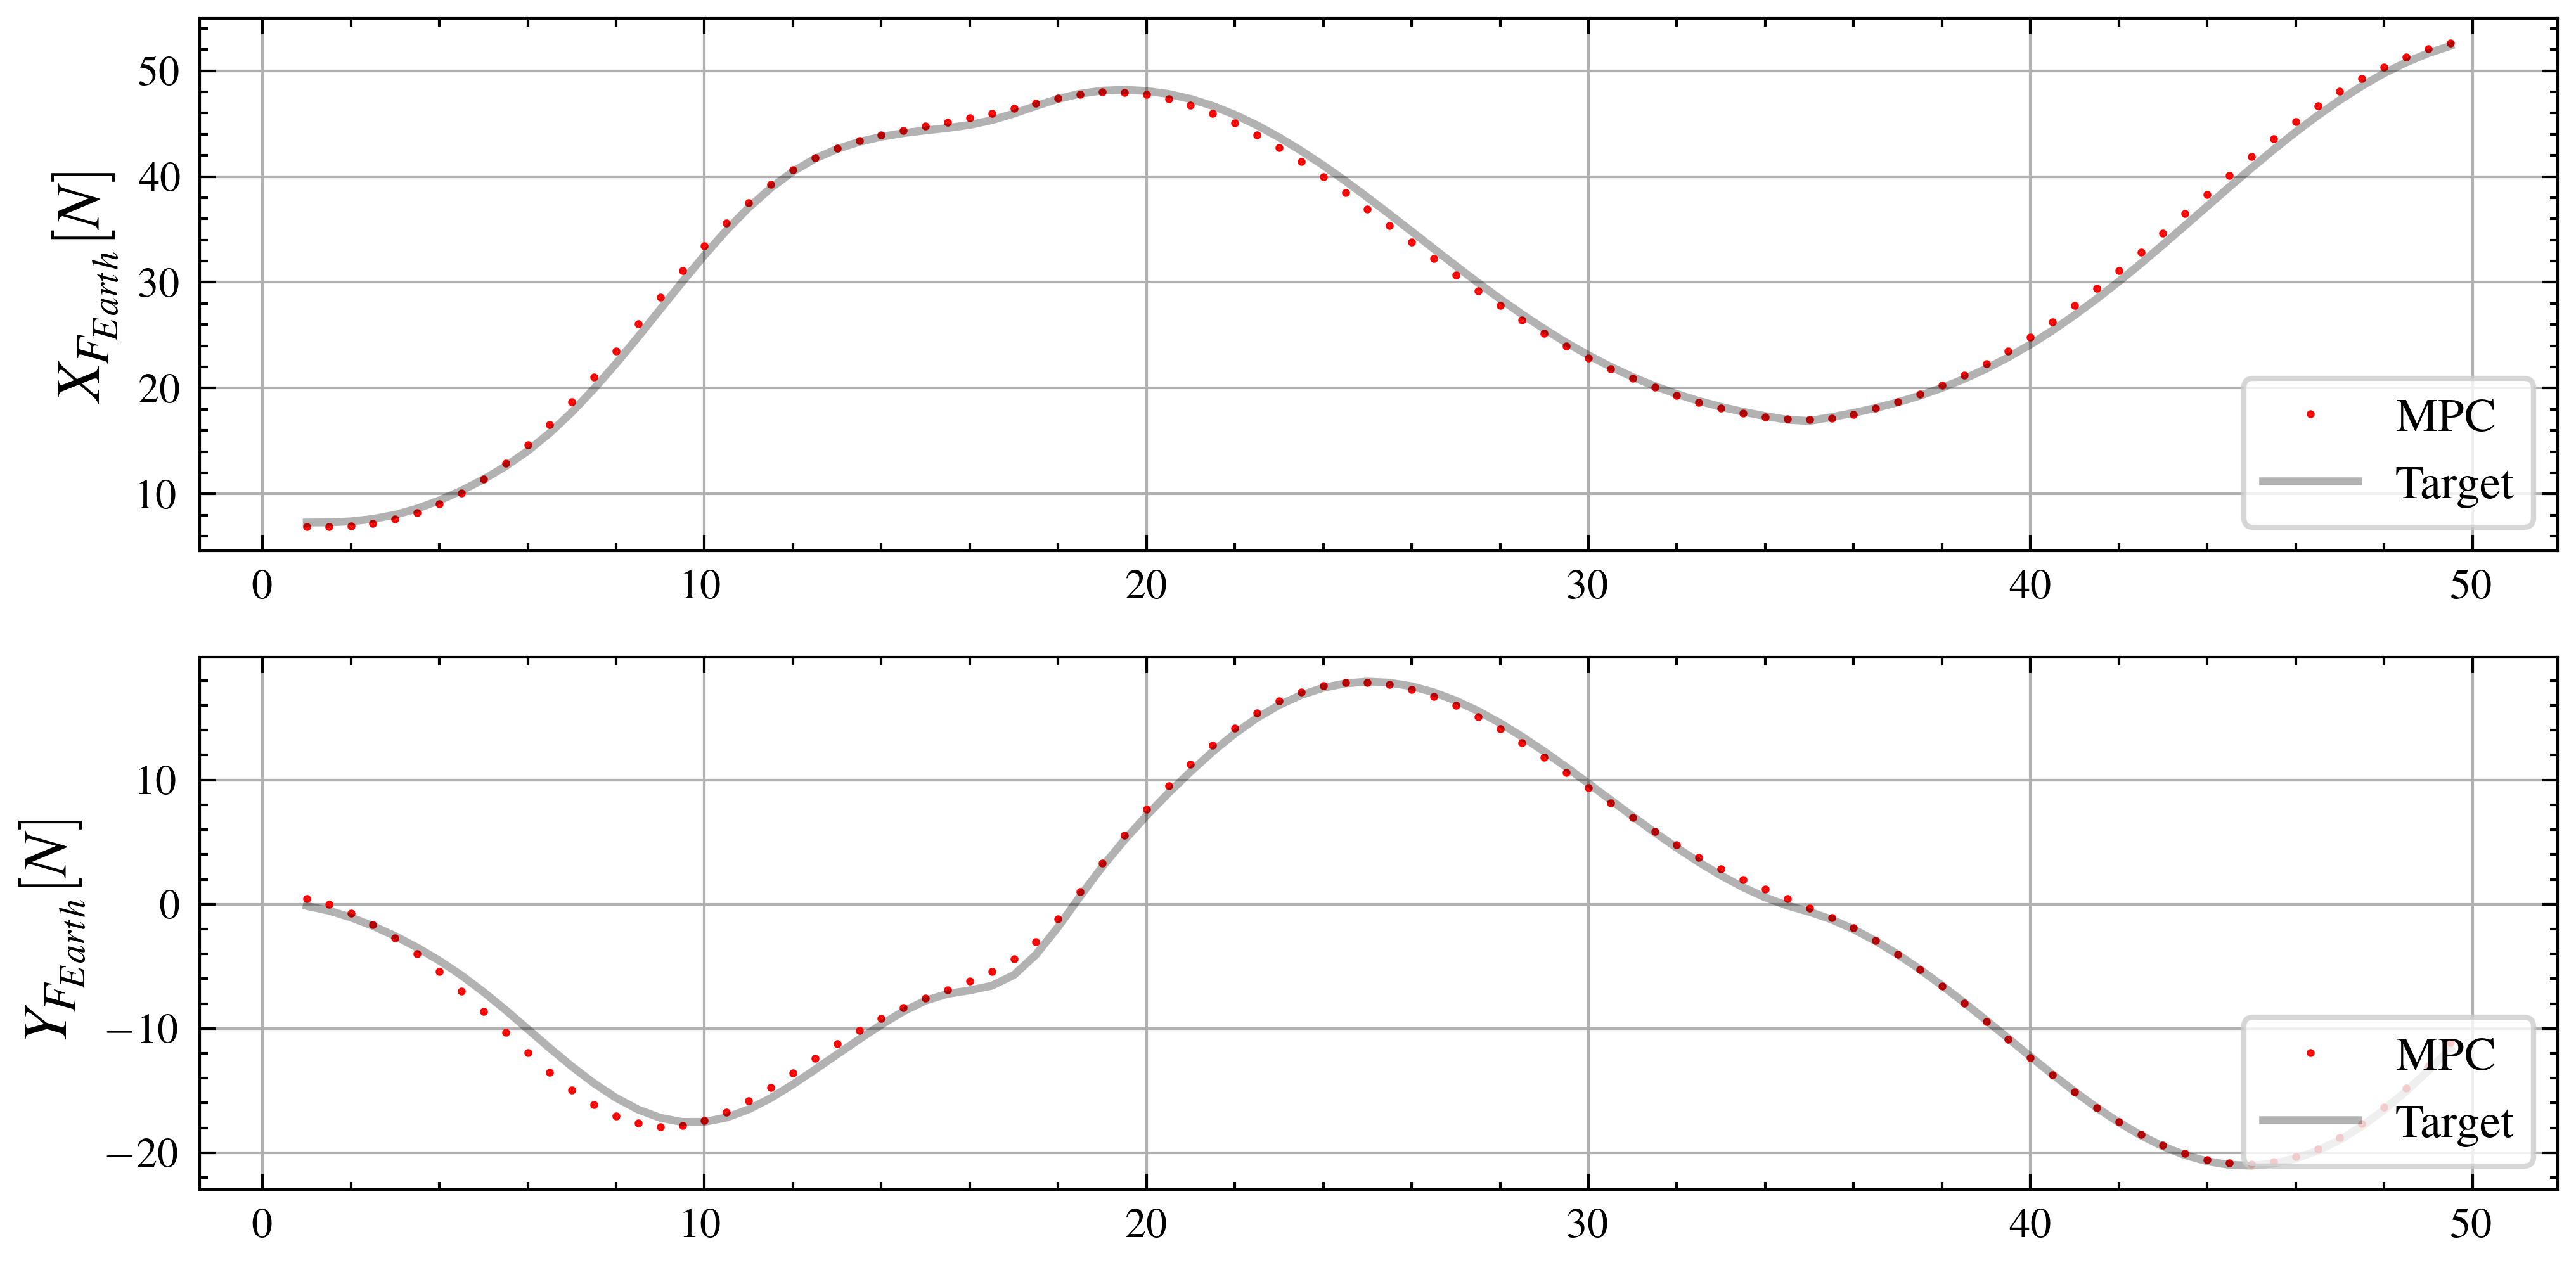

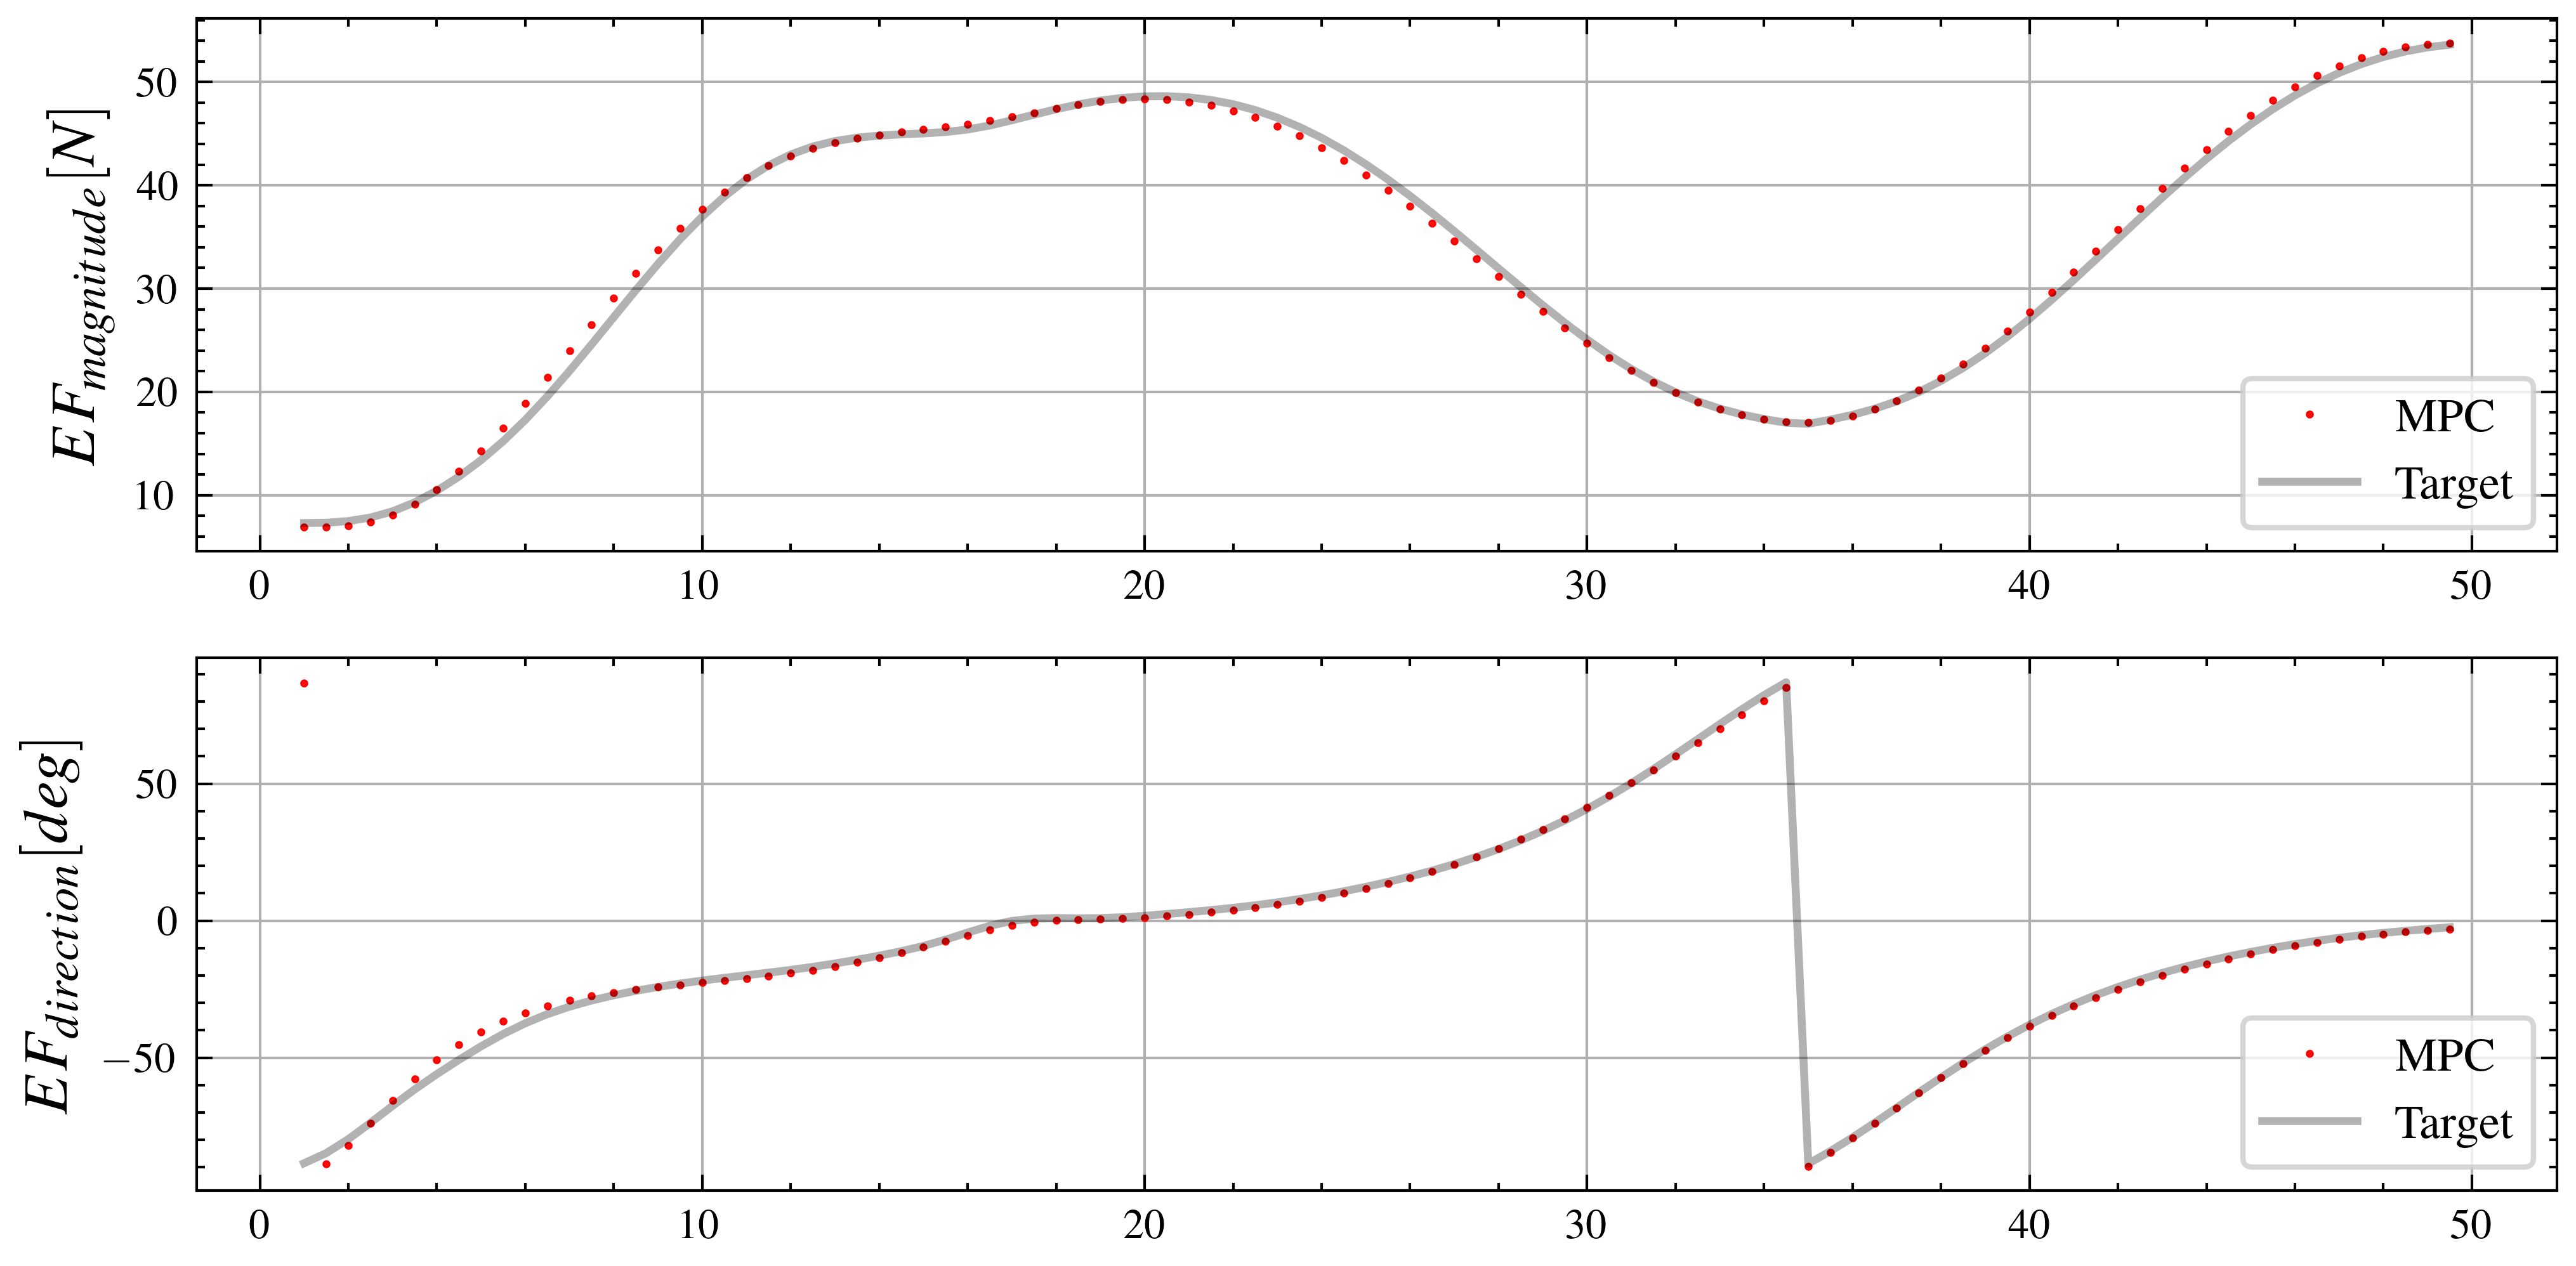

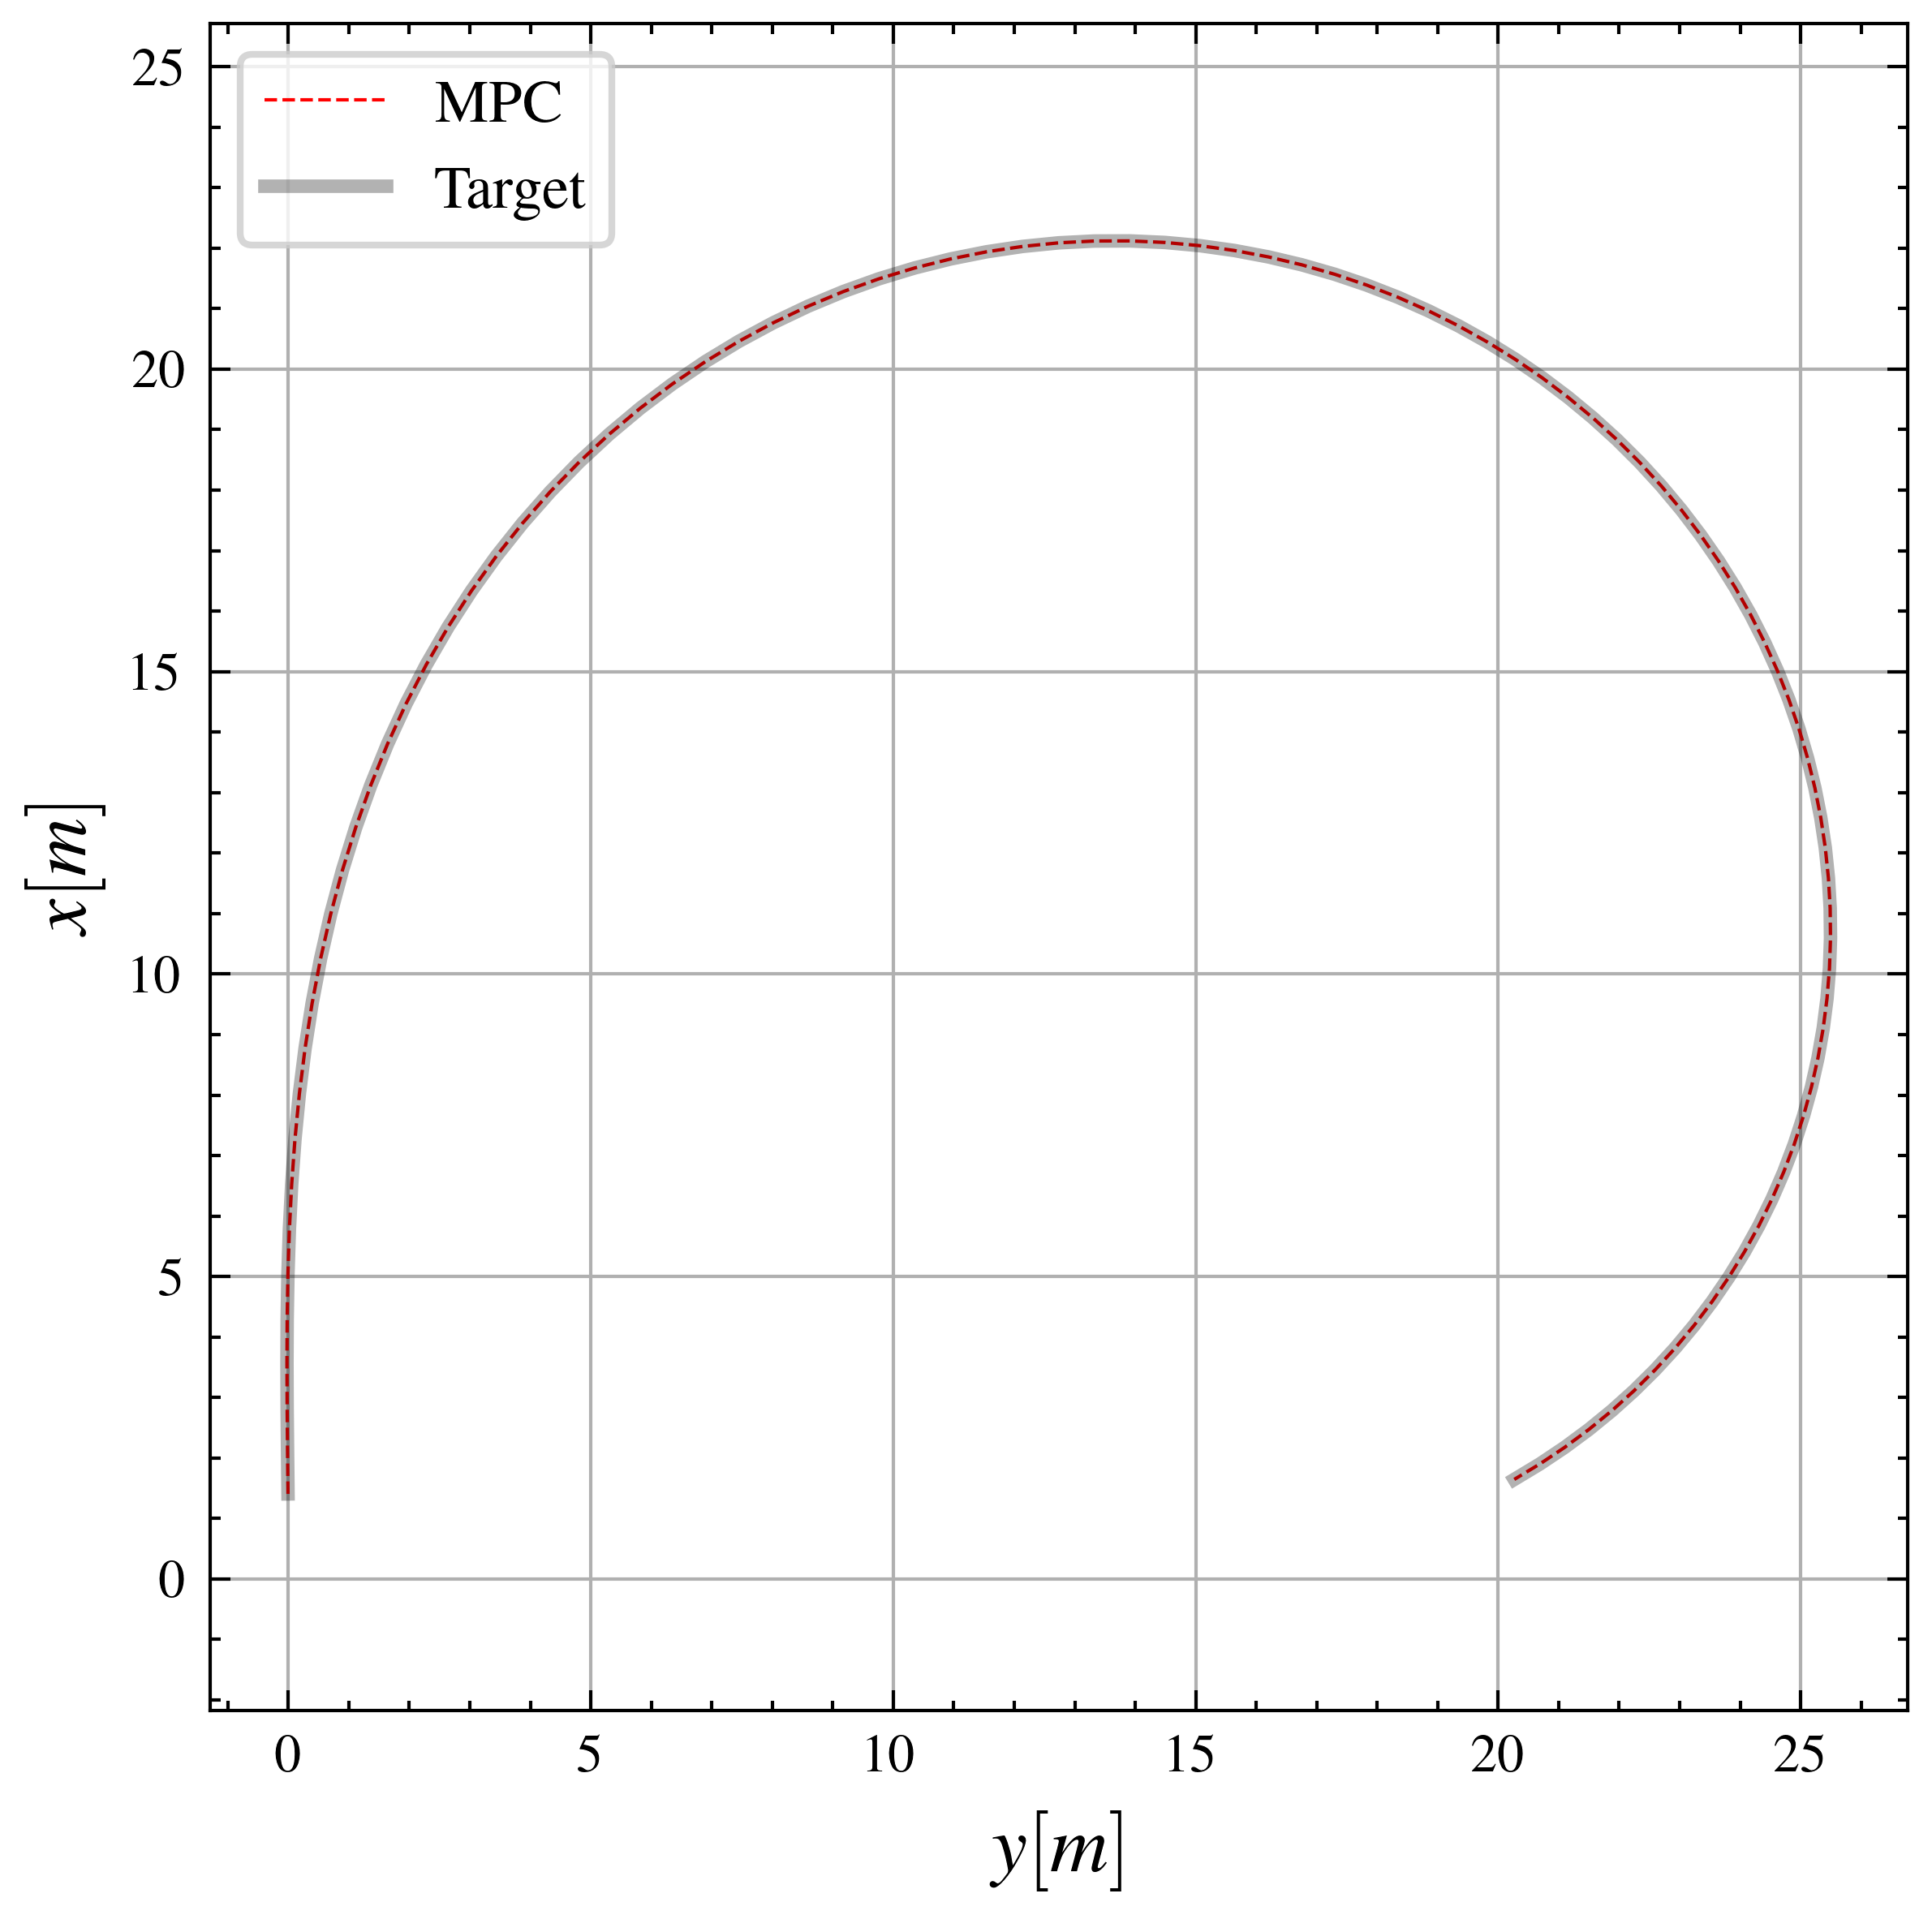

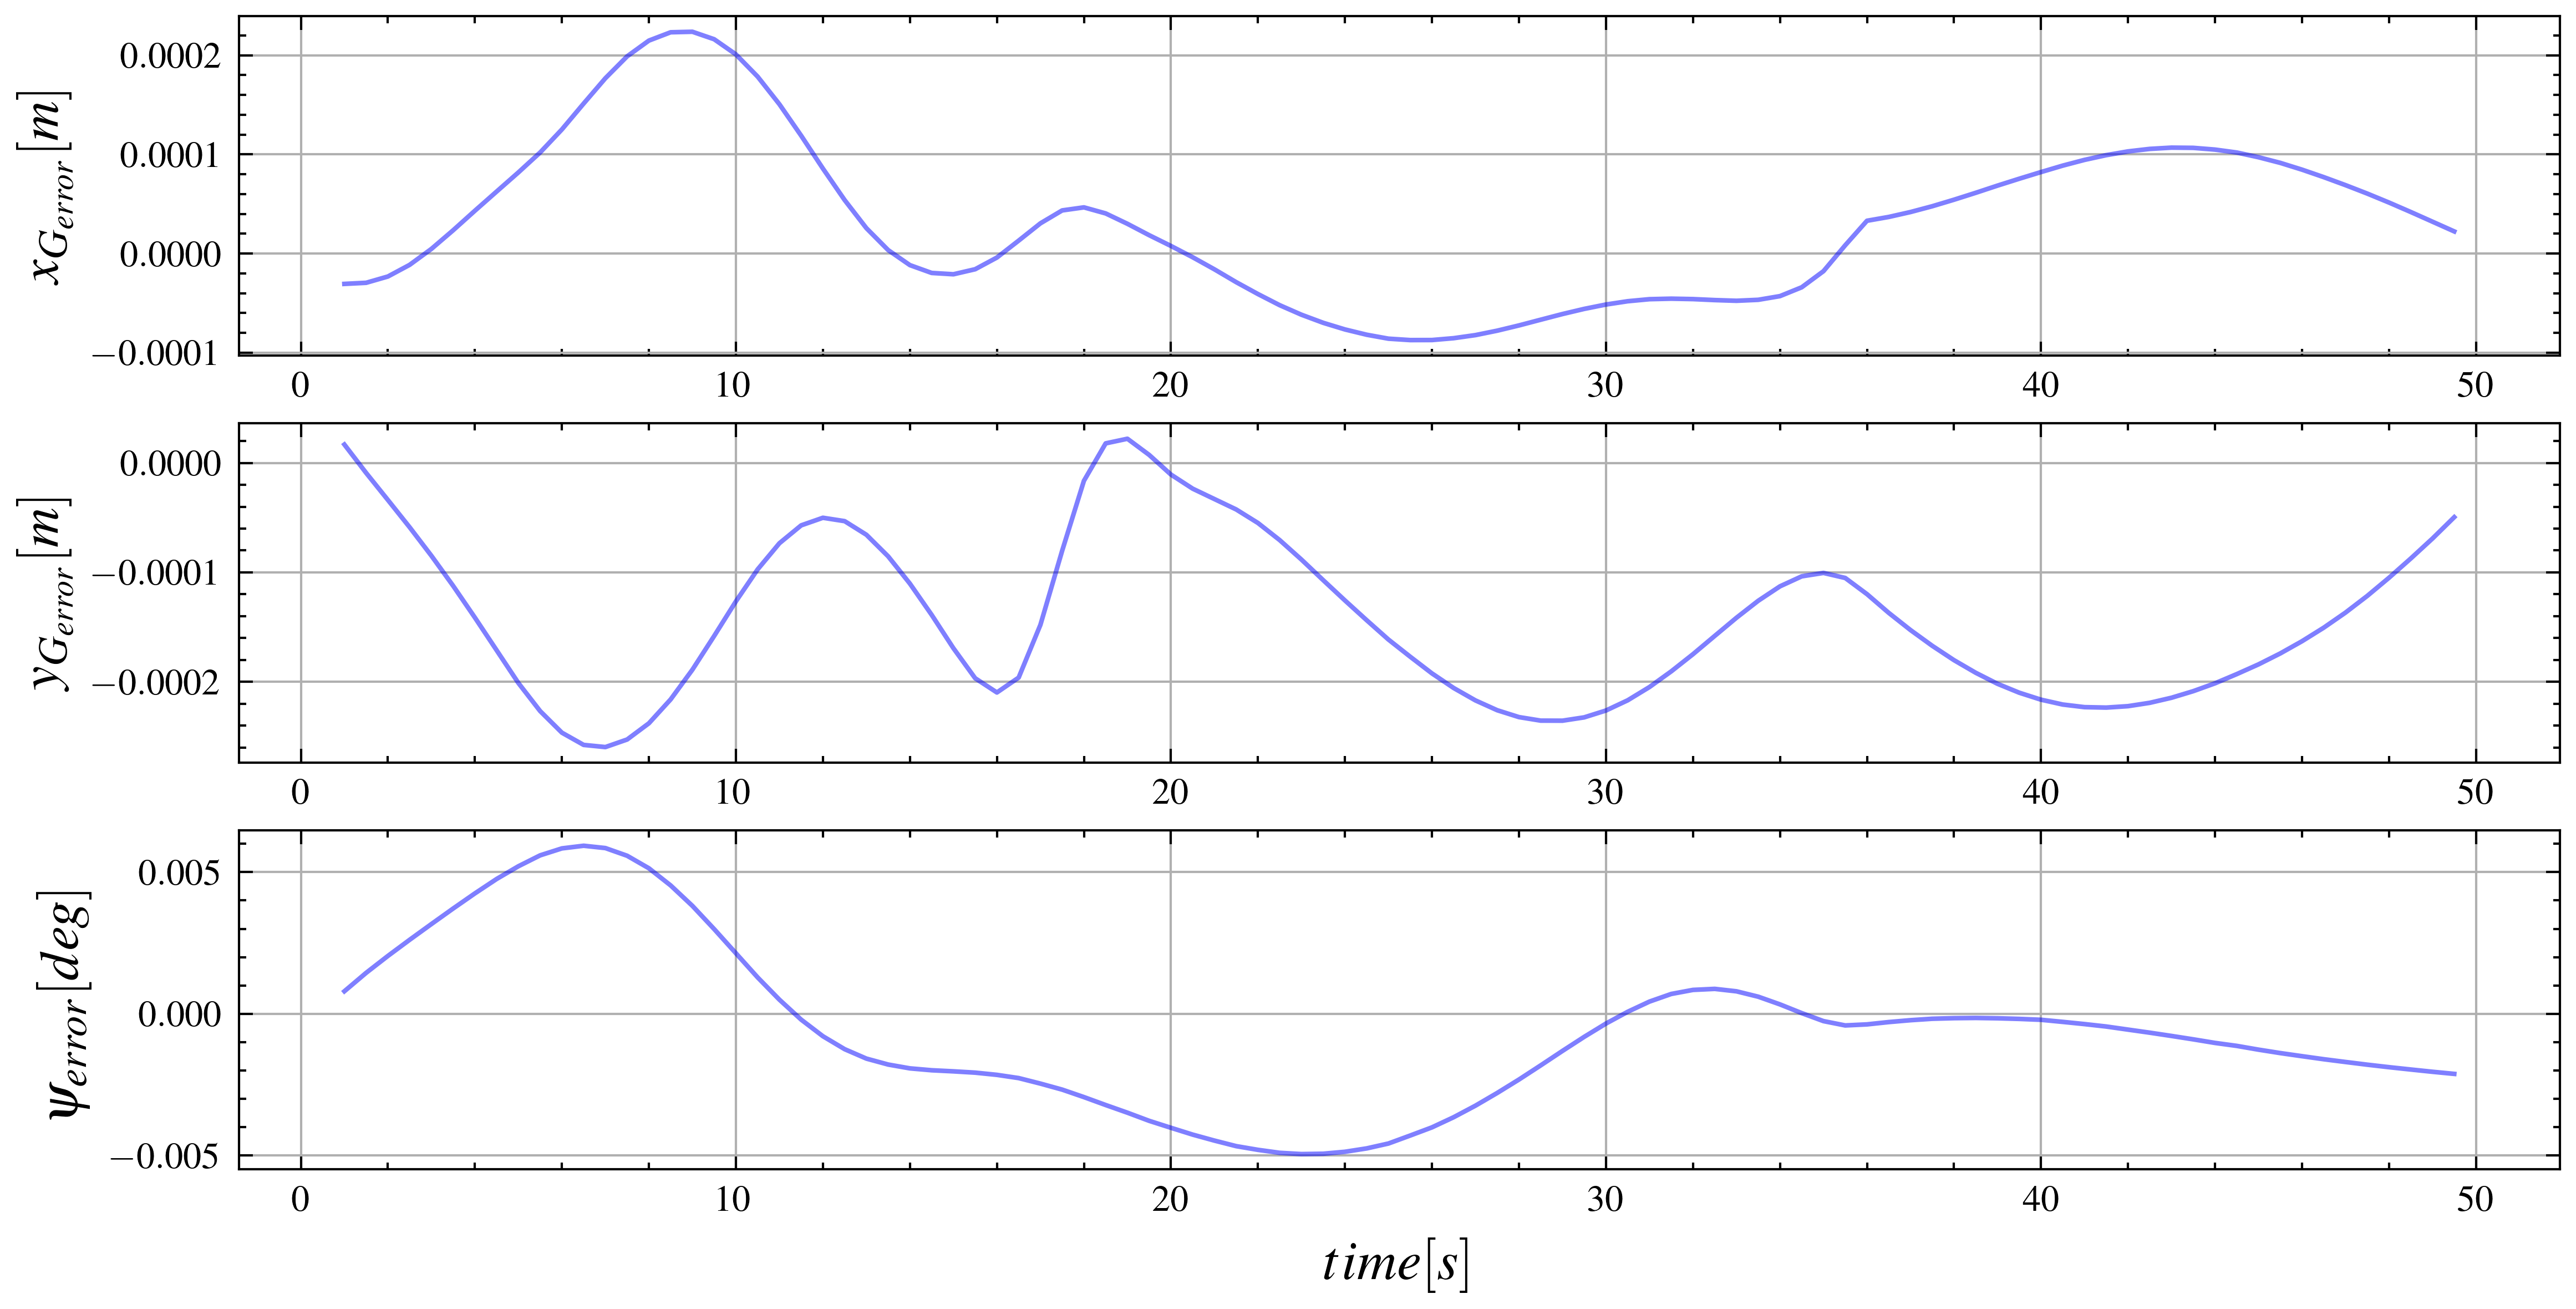

In [25]:
using CSV, DataFrames
using PyPlot, LaTeXStrings, PyCall
@pyimport numpy as np
@pyimport scienceplots

# データの読み込み
obs = CSV.read("/home/hirukawa/myenv/Lab/MCMC-MPC_KVLCC2/observation/obs_EF.csv", DataFrame)
data = CSV.read("/home/hirukawa/myenv/Lab/MCMC-MPC_KVLCC2/MPC/results/MPC_result1.csv", DataFrame)

duration = 50
dt = 0.5
sampling = Int(duration / dt)
whole_step = Int(duration / dt)
time_list = range(0.00, stop=duration,  step=dt)

data_start = 3
data_end = whole_step
obs_start = 3
obs_end = whole_step

# グラフスタイルの設定
plt.style.use(["science", "ieee"])

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(data[data_start:data_end,"time"], data[data_start:data_end,"X_F"], ".", label="MPC", color="red", markersize=1)
ax1.plot(obs[obs_start:obs_end,"time"], obs[obs_start:obs_end,"X_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax1.set_ylabel(L"X_{F_{Body}}[N]", fontsize=12)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data[data_start:data_end,"time"], data[data_start:data_end,"Y_F"], ".", label="MPC", color="red", markersize=1)
ax2.plot(obs[obs_start:obs_end,"time"], obs[obs_start:obs_end,"Y_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax2.set_ylabel(L"Y_{F_{Body}}[N]", fontsize=12)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
ax2.set_xlabel(L"time[s]", fontsize=12)

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data[data_start:data_end,"time"], data[data_start:data_end,"N_F"], ".", label="MPC", color="red", markersize=1)
ax3.plot(obs[obs_start:obs_end,"time"], obs[obs_start:obs_end,"N_wind"], "-", label="Target", color="k", alpha=0.5, linewidth=1.5)
ax3.set_ylabel(L"N_{F_{Body}}[Nm]", fontsize=12)
ax3.grid()
ax3.legend(frameon=true, loc="lower right", fontsize=9)
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data[data_start:data_end,"time"], data[data_start:data_end,"X_F"].*cos.(data[data_start:data_end,"ψ"]) .- data[data_start:data_end,"Y_F"].*sin.(data[data_start:data_end,"ψ"]), ".", label="MPC", color="red", markersize=1)
ax1.plot(obs[obs_start:obs_end,"time"], obs[obs_start:obs_end,"X_wind"].*cos.(obs[obs_start:obs_end,"ψ"]).-obs[obs_start:obs_end,"Y_wind"].*sin.(obs[obs_start:obs_end,"ψ"]), "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax1.set_ylabel(L"X_{F_{Earth}}[N]", fontsize=12)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[data_start:data_end,"time"], data[data_start:data_end,"X_F"].*sin.(data[data_start:data_end,"ψ"]) .+ data[data_start:data_end,"Y_F"].*cos.(data[data_start:data_end,"ψ"]), ".", label="MPC", color="red", markersize=1)
ax2.plot(obs[obs_start:obs_end,"time"], obs[obs_start:obs_end,"X_wind"].*sin.(obs[obs_start:obs_end,"ψ"]).+obs[obs_start:obs_end,"Y_wind"].*cos.(obs[obs_start:obs_end,"ψ"]), "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax2.set_ylabel(L"Y_{F_{Earth}}[N]", fontsize=12)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
display(fig)

fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(data[data_start:data_end,"time"], sqrt.(data[data_start:data_end,"X_F"].^2 .+ data[data_start:data_end,"Y_F"].^2), ".", label="MPC", color="red", markersize=1)
ax1.plot(obs[obs_start:obs_end,"time"], sqrt.(obs[obs_start:obs_end,"X_wind"].^2 .+ obs[obs_start:obs_end,"Y_wind"].^2), "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax1.set_ylabel(L"EF_{magnitude}[N]", fontsize=12)
ax1.grid()
ax1.legend(frameon=true, loc="lower right", fontsize=9)

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(data[data_start:data_end,"time"], atan.(data[data_start:data_end,"X_F"] ./ data[data_start:data_end,"Y_F"])./pi.*180, ".", label="MPC", color="red", markersize=1)
ax2.plot(obs[obs_start:obs_end,"time"], atan.(obs[obs_start:obs_end,"X_wind"] ./ obs[obs_start:obs_end,"Y_wind"])./pi.*180, "-", label="Target", c="k", alpha=0.3, linewidth=1.5)
ax2.set_ylabel(L"EF_{direction}[deg]", fontsize=12)
ax2.grid()
ax2.legend(frameon=true, loc="lower right", fontsize=9)
display(fig)

fig = plt.figure(figsize=(4.5, 4.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[data_start:data_end,"y"], data[data_start:data_end,"x"], "--", label="MPC", c="r", linewidth=0.5)
ax.plot(obs[obs_start:obs_end,"y"], obs[obs_start:obs_end,"x"], "-", label="Target", c="k", alpha=0.3, linewidth=2)
ax.set_ylabel(L"x[m]", fontsize=12)
ax.set_xlabel(L"y[m]", fontsize=12)
ax.legend(frameon=true, loc="upper left", fontsize=9)
ax.axis("equal")
# ax.set_xlim(-7, 20)
ax.grid()
display(fig)



fig = plt.figure(figsize=(9, 4.5))
# x
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(data[data_start:data_end,"time"], data[data_start:data_end,"x"].-obs[obs_start:obs_end,"x"], "-",  color="b", alpha=0.5, linewidth=1)
ax1.set_ylabel(L"x_{G_{error}}[m]", fontsize=12)
ax1.grid()
# y
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data[data_start:data_end,"time"], data[data_start:data_end,"y"].-obs[obs_start:obs_end,"y"], "-",  color="b", alpha=0.5, linewidth=1)
ax2.set_ylabel(L"y_{G_{error}}[m]", fontsize=12)
ax2.grid()
# x^2+y^2
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data[data_start:data_end,"time"], (data[data_start:data_end,"ψ"].-obs[obs_start:obs_end,"ψ"])./pi.*180, "-", color="b", alpha=0.5, linewidth=1)
ax3.set_ylabel(L"\psi_{error}[deg]", fontsize=12)
ax3.grid()
ax3.set_xlabel(L"time[s]", fontsize=12)
display(fig)
